In [197]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
!pip install tqdm
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable


In [198]:
df = data = pd.read_csv('heart_attack_risk_dataset.csv')

In [199]:
data

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [201]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
target = data['Heart_Attack_Risk']
features = data.drop('Heart_Attack_Risk', axis = 1)

In [203]:
features

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149


In [204]:
data = pd.get_dummies(data, columns=['Physical_Activity_Level'])

In [205]:
data = pd.get_dummies(data, columns=['Gender'])

In [206]:
data = pd.get_dummies(data, columns=['Stress_Level', 'Chest_Pain_Type', 'Thalassemia'])

In [207]:
data['ECG_Results'].unique()

array(['Normal', 'ST-T abnormality', 'Left Ventricular Hypertrophy'],
      dtype=object)

In [208]:
data = pd.get_dummies(data, columns=['ECG_Results'])

In [209]:
data = data.drop('Heart_Attack_Risk', axis = 1)

In [210]:
data.iloc[:,14:]

,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Gender_Female,Gender_Male,Stress_Level_High,Stress_Level_Low,Stress_Level_Moderate,Chest_Pain_Type_Asymptomatic,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Left Ventricular Hypertrophy,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
1,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True
2,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True
3,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False
4,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,True
49996,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,True
49997,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False
49998,True,False,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False


In [211]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       50000 non-null  int64  
 1   Smoking                                   50000 non-null  int64  
 2   Alcohol_Consumption                       50000 non-null  int64  
 3   BMI                                       50000 non-null  float64
 4   Diabetes                                  50000 non-null  int64  
 5   Hypertension                              50000 non-null  int64  
 6   Cholesterol_Level                         50000 non-null  float64
 7   Resting_BP                                50000 non-null  int64  
 8   Heart_Rate                                50000 non-null  int64  
 9   Family_History                            50000 non-null  int64  
 10  Fasting_Blood_Sugar               

In [212]:
data

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Chest_Pain_Type_Asymptomatic,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Left Ventricular Hypertrophy,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,69,1,0,34.61,1,0,152.1,171,85,0,...,False,False,True,False,False,False,True,False,True,False
1,32,0,0,22.75,0,0,166.8,126,103,0,...,True,False,False,False,False,True,False,False,False,True
2,89,0,1,35.32,0,0,272.3,123,127,0,...,False,False,False,True,False,False,True,False,False,True
3,78,0,1,18.23,1,0,237.7,144,125,0,...,False,False,False,True,True,False,False,True,False,False
4,38,1,0,19.82,0,0,207.7,123,107,0,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,0,0,39.93,0,0,269.9,171,113,0,...,False,False,False,True,False,False,True,False,False,True
49996,35,0,0,18.10,0,0,235.8,146,71,0,...,False,False,True,False,True,False,False,False,False,True
49997,46,0,1,21.42,0,0,172.8,146,85,1,...,False,False,False,True,True,False,False,True,False,False
49998,56,0,1,29.93,0,0,244.1,151,110,0,...,True,False,False,False,False,False,True,False,True,False


In [213]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
scaler = MinMaxScaler()

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       50000 non-null  int64  
 1   Smoking                                   50000 non-null  int64  
 2   Alcohol_Consumption                       50000 non-null  int64  
 3   BMI                                       50000 non-null  float64
 4   Diabetes                                  50000 non-null  int64  
 5   Hypertension                              50000 non-null  int64  
 6   Cholesterol_Level                         50000 non-null  float64
 7   Resting_BP                                50000 non-null  int64  
 8   Heart_Rate                                50000 non-null  int64  
 9   Family_History                            50000 non-null  int64  
 10  Fasting_Blood_Sugar               

In [216]:
data = data.astype(float)

In [217]:
data1 = data

In [218]:
scaled_data = scaler.fit_transform(data)

In [219]:
scaled_data

array([[0.71830986, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1971831 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.3943662 , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53521127, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76056338, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [220]:
data = pd.DataFrame(data=scaled_data, columns = data1.columns)

In [221]:
data

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Chest_Pain_Type_Asymptomatic,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Left Ventricular Hypertrophy,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,0.718310,1.0,0.0,0.7844,1.0,0.0,0.014000,0.910112,0.362319,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.197183,0.0,0.0,0.3100,0.0,0.0,0.112000,0.404494,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.000000,0.0,1.0,0.8128,0.0,0.0,0.815333,0.370787,0.971014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.845070,0.0,1.0,0.1292,1.0,0.0,0.584667,0.606742,0.942029,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.281690,1.0,0.0,0.1928,0.0,0.0,0.384667,0.370787,0.681159,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.042254,0.0,0.0,0.9972,0.0,0.0,0.799333,0.910112,0.768116,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
49996,0.239437,0.0,0.0,0.1240,0.0,0.0,0.572000,0.629213,0.159420,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
49997,0.394366,0.0,1.0,0.2568,0.0,0.0,0.152000,0.629213,0.362319,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
49998,0.535211,0.0,1.0,0.5972,0.0,0.0,0.627333,0.685393,0.724638,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [222]:
df

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate


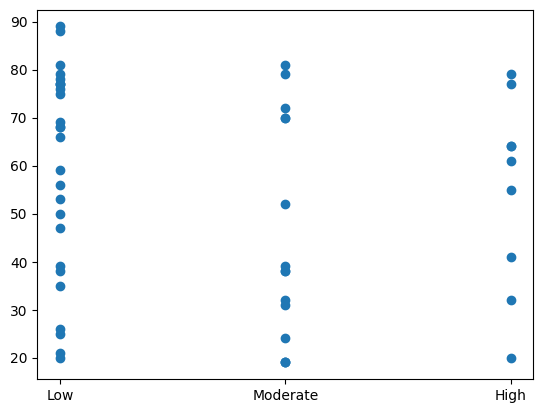

In [223]:
plt.scatter(df['Heart_Attack_Risk'][:50],df['Age'][:50])

In [224]:
data

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Chest_Pain_Type_Asymptomatic,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Left Ventricular Hypertrophy,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,0.718310,1.0,0.0,0.7844,1.0,0.0,0.014000,0.910112,0.362319,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.197183,0.0,0.0,0.3100,0.0,0.0,0.112000,0.404494,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.000000,0.0,1.0,0.8128,0.0,0.0,0.815333,0.370787,0.971014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.845070,0.0,1.0,0.1292,1.0,0.0,0.584667,0.606742,0.942029,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.281690,1.0,0.0,0.1928,0.0,0.0,0.384667,0.370787,0.681159,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.042254,0.0,0.0,0.9972,0.0,0.0,0.799333,0.910112,0.768116,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
49996,0.239437,0.0,0.0,0.1240,0.0,0.0,0.572000,0.629213,0.159420,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
49997,0.394366,0.0,1.0,0.2568,0.0,0.0,0.152000,0.629213,0.362319,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
49998,0.535211,0.0,1.0,0.5972,0.0,0.0,0.627333,0.685393,0.724638,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [225]:
data

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Chest_Pain_Type_Asymptomatic,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Left Ventricular Hypertrophy,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,0.718310,1.0,0.0,0.7844,1.0,0.0,0.014000,0.910112,0.362319,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.197183,0.0,0.0,0.3100,0.0,0.0,0.112000,0.404494,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.000000,0.0,1.0,0.8128,0.0,0.0,0.815333,0.370787,0.971014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.845070,0.0,1.0,0.1292,1.0,0.0,0.584667,0.606742,0.942029,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.281690,1.0,0.0,0.1928,0.0,0.0,0.384667,0.370787,0.681159,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.042254,0.0,0.0,0.9972,0.0,0.0,0.799333,0.910112,0.768116,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
49996,0.239437,0.0,0.0,0.1240,0.0,0.0,0.572000,0.629213,0.159420,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
49997,0.394366,0.0,1.0,0.2568,0.0,0.0,0.152000,0.629213,0.362319,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
49998,0.535211,0.0,1.0,0.5972,0.0,0.0,0.627333,0.685393,0.724638,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [226]:
target

0             Low
1        Moderate
2             Low
3             Low
4        Moderate
           ...   
49995        High
49996    Moderate
49997         Low
49998    Moderate
49999    Moderate
Name: Heart_Attack_Risk, Length: 50000, dtype: object

In [227]:
data

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Chest_Pain_Type_Asymptomatic,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Left Ventricular Hypertrophy,ECG_Results_Normal,ECG_Results_ST-T abnormality
0,0.718310,1.0,0.0,0.7844,1.0,0.0,0.014000,0.910112,0.362319,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.197183,0.0,0.0,0.3100,0.0,0.0,0.112000,0.404494,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.000000,0.0,1.0,0.8128,0.0,0.0,0.815333,0.370787,0.971014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.845070,0.0,1.0,0.1292,1.0,0.0,0.584667,0.606742,0.942029,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.281690,1.0,0.0,0.1928,0.0,0.0,0.384667,0.370787,0.681159,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.042254,0.0,0.0,0.9972,0.0,0.0,0.799333,0.910112,0.768116,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
49996,0.239437,0.0,0.0,0.1240,0.0,0.0,0.572000,0.629213,0.159420,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
49997,0.394366,0.0,1.0,0.2568,0.0,0.0,0.152000,0.629213,0.362319,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
49998,0.535211,0.0,1.0,0.5972,0.0,0.0,0.627333,0.685393,0.724638,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [228]:
target.replace('Low', 0.0, inplace = True)
target.replace('Moderate', 1.0, inplace = True)
target.replace('High', 2.0, inplace = True)
target.astype(float)

C:\Users\yoshi\AppData\Local\Temp\ipykernel_18072\1658967680.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target.replace('High', 2.0, inplace = True)


0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
49995    2.0
49996    1.0
49997    0.0
49998    1.0
49999    1.0
Name: Heart_Attack_Risk, Length: 50000, dtype: float64

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [230]:
X = X_train.to_numpy()
y = y_train.to_numpy()

In [231]:
X_test.to_numpy()
y_test.to_numpy()

array([0., 0., 0., ..., 0., 0., 0.])

In [237]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree1:
    def __init__(self, max_depth=7, min_samples=10):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self.grow_tree(X, y)

    def predict(self, X):
        X = np.array(X)
        return np.array([self.traverse_tree(x, self.tree) for x in X])

    def entropy(self, y):
        y = y.astype(int)
        hist = np.bincount(y, minlength=3) 
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def most_common(self, y):
        labels, counts = np.unique(y, return_counts=True)
        return labels[np.argmax(counts)]

    def best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = -1

        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])
            for threshold in thresholds:
                gain = self.information_gain(X[:, i], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
        return best_feature, best_threshold

    def information_gain(self, X_column, y, threshold):
        if len(np.unique(y)) == 1:
            return 0

        n = len(y)
        parent = self.entropy(y)

        left_indexes = np.argwhere(X_column <= threshold).flatten()
        right_indexes = np.argwhere(X_column > threshold).flatten()

        if len(left_indexes) == 0 or len(right_indexes) == 0:
            return 0

        e_l, n_l = self.entropy(y[left_indexes]), len(left_indexes)
        e_r, n_r = self.entropy(y[right_indexes]), len(right_indexes)

        child = (n_l / n) * e_l + (n_r / n) * e_r
        return parent - child

    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Условие остановки
        if n_samples <= self.min_samples or depth >= self.max_depth or n_labels == 1:
            return Node(value=self.most_common(y))

        best_feature, best_threshold = self.best_split(X, y)

        # Если разбиение невозможно, возвращаем лист
        if best_feature is None or best_threshold is None:
            return Node(value=self.most_common(y))

        left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()

        # Если не удалось разбить, возвращаем листовой узел
        if len(left_indexes) == 0 or len(right_indexes) == 0:
            return Node(value=self.most_common(y))

        # Рекурсивное построение дерева
        left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth + 1)
        right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right)

    def traverse_tree(self, x, tree):
        if tree is None:
            raise ValueError("Tree node is None. Ensure the tree is properly constructed.")
        
        if tree.is_leaf_node():
            return tree.value

        if x[tree.feature] <= tree.threshold:
            return self.traverse_tree(x, tree.left)
        return self.traverse_tree(x, tree.right)

In [84]:
tree = DecisionTree()
tree.fit(X, y)

In [85]:
predicted = tree.predict(X_test)
np.sum(predicted == y_test) / len(y_test)

0.49712

In [238]:
import numpy as np
from collections import Counter

# Узел дерева решений
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature          
        self.threshold = threshold      
        self.left = left                
        self.right = right              
        self.value = value              

    def is_leaf_node(self):
        return self.value is not None

# Класс дерева решений
class DecisionTree:
    def __init__(self, max_depth=7, min_samples=10):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        X = np.array(X)
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _entropy(self, y):
        hist = np.bincount(y, minlength=3)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_class(self, y):
        return Counter(y).most_common(1)[0][0]

    def _best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = -1
        n_features = X.shape[1]
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(X[:, feature], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _information_gain(self, X_column, y, threshold):
        parent_entropy = self._entropy(y)
        left_mask = X_column <= threshold
        right_mask = X_column > threshold

        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0

        n = len(y)
        n_l, n_r = np.sum(left_mask), np.sum(right_mask)

        e_l, e_r = self._entropy(y[left_mask]), self._entropy(y[right_mask])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        return parent_entropy - child_entropy

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if n_samples <= self.min_samples or depth >= self.max_depth or n_labels == 1:
            return Node(value=self._most_common_class(y))

        feature, threshold = self._best_split(X, y)

        if feature is None or threshold is None:
            return Node(value=self._most_common_class(y))

        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold

        left_subtree = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._grow_tree(X[right_mask], y[right_mask], depth + 1)

        return Node(feature=feature, threshold=threshold, left=left_subtree, right=right_subtree)

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_trees=10, max_depth=7, min_samples=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.trees = []
        self.oob_samples = []
        self.oob_predictions = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples = X.shape[0]

        for _ in range(self.n_trees):
            
            indices = np.random.choice(n_samples, n_samples, replace=True)
            oob_indices = [i for i in range(n_samples) if i not in indices]

            tree = DecisionTree(max_depth=self.max_depth, min_samples=self.min_samples)
            tree.fit(X[indices], y[indices])

            self.trees.append(tree)
            self.oob_samples.append(oob_indices)
            if oob_indices:
                self.oob_predictions.append((oob_indices, tree.predict(X[oob_indices])))

    def predict(self, X):
        
        predictions = np.array([tree.predict(X) for tree in self.trees])
        predictions = np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=predictions)
        return predictions

    def oob_score(self, X, y):
        
        n_samples = X.shape[0]
        oob_votes = [[] for _ in range(n_samples)]

        for oob_indices, preds in self.oob_predictions:
            for idx, pred in zip(oob_indices, preds):
                oob_votes[idx].append(pred)

        y_pred = []
        y_real = []
        for i in range(n_samples):
            if oob_votes[i]:
                y_pred.append(Counter(oob_votes[i]).most_common(1)[0][0])
                y_real.append(y[i])

        return np.mean(np.array(y_pred) == np.array(y_real))


if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split

    
    X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_classes=3, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    forest = RandomForest(n_trees=10, max_depth=7, min_samples=10)
    forest.fit(X_train, y_train)

    
    y_pred = forest.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    oob_accuracy = forest.oob_score(X_train, y_train)

In [239]:
clf = RandomForest()

In [240]:
clf.fit(X,y)

In [241]:
clf.fit(X,y)
predict = clf.predict(X_test)

In [242]:
predict


array([2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2,
       2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2,
       1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2])

In [243]:
np.sum(predict==y_test)/len(y_test)

0.89

In [185]:
test_score = []
n_trees = []
for i in tqdm(range(2, 102, 10)):
    clf = RandomForest(n_trees=i)
    clf.fit(X, y)
    n_trees.append(i)
    predict = clf.predict(X_test)
    test_score.append(np.sum(predict==y_test)/len(y_test))

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [23:59<00:00, 143.98s/it]


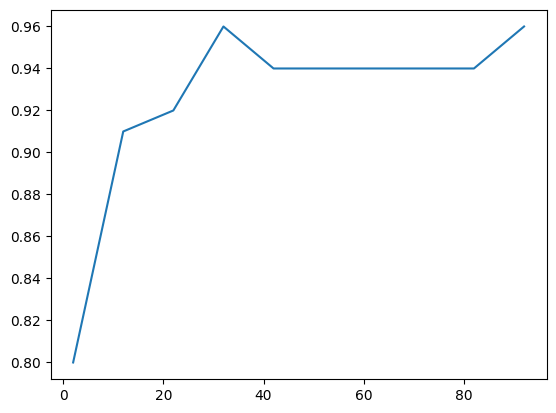

In [186]:

plt.plot(n_trees, test_score)
plt.show()

In [187]:
test_score

[0.8, 0.91, 0.92, 0.96, 0.94, 0.94, 0.94, 0.94, 0.94, 0.96]

In [232]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [233]:
np.sum(y_pred==y_test)/len(y_test)

0.50272

In [234]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [235]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [236]:
np.sum(y_pred==y_test)/len(y_test)

0.49688

In [244]:
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

In [245]:
np.sum(predict==y_test)/len(y_test)

0.81